<a href="https://colab.research.google.com/github/noiravee/News-article-Classification/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로이터 뉴스데이터셋 분류(LSTM) 코드 스터디

출처: 모두의 딥러닝(2판)




In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test)= reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
print(len(X_train))
print(len(X_test))


8982
2246


In [8]:
X_train

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [9]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

2376
145.5398574927633


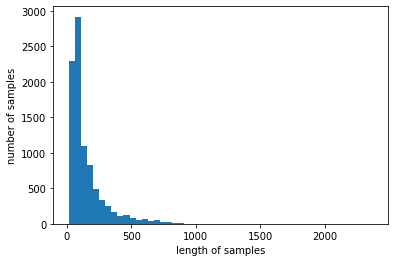

In [13]:
print(max(len(l) for l in X_train))
print(sum(map(len,X_train))/len(X_train))


plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


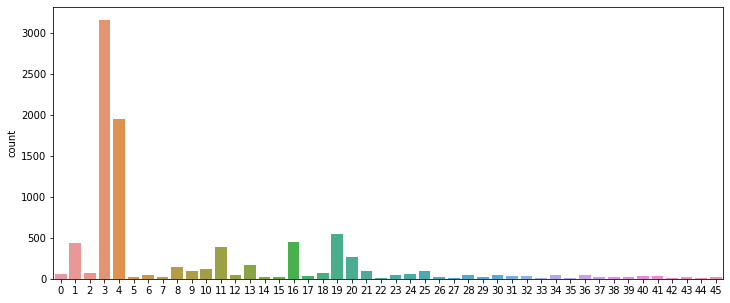

In [15]:
fig, axe =plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [17]:
unique_elements, counts_elements= np.unique(y_train, return_counts=True)
print(np.asarray(counts_elements))

[  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
   26   20  444   39   66  549  269  100   15   41   62   92   24   15
   48   19   45   39   32   11   50   10   49   19   19   24   36   30
   13   21   12   18]


In [23]:
word_to_index= reuters.get_word_index()


In [32]:
index_to_word={}
for key, value in word_to_index.items():
  index_to_word[value]=key

In [34]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


classification by LSTM

In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
(X_train, y_train), (X_test, y_test)= reuters.load_data(num_words=1000, test_split=0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
from keras.preprocessing import sequence

max_len= 100
X_train= pad_sequences(X_train, maxlen=max_len) #훈련용 뉴스기사 패딩
X_test= pad_sequences(X_test, maxlen=max_len) #테스트용 뉴스기사 패딩

# 뉴스기사 단어수가 100개가 넘으면 100개만 선택, 나머지는 제거, 100보다 부족하면 부족한 부분 0으로 패딩

In [4]:
y_train= to_categorical(y_train) #훈련용 뉴스기사 레이블 원핫인코딩
y_test= to_categorical(y_test) #테스트용 뉴스기사 레이블 원핫인코딩

In [5]:
model=Sequential()
model.add(Embedding(1000,120))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [6]:
es= EarlyStopping(monitor= 'val_loss', mode='min',verbose=1, patience=4)
mc= ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
90/90 [==============================] - 22s 217ms/step - loss: 2.9668 - accuracy: 0.3259 - val_loss: 2.0671 - val_accuracy: 0.4626
Epoch 2/20
90/90 [==============================] - 19s 209ms/step - loss: 2.0128 - accuracy: 0.4779 - val_loss: 1.8810 - val_accuracy: 0.5134
Epoch 3/20
90/90 [==============================] - 19s 207ms/step - loss: 1.7904 - accuracy: 0.5267 - val_loss: 1.7691 - val_accuracy: 0.5432
Epoch 4/20
90/90 [==============================] - 19s 211ms/step - loss: 1.6980 - accuracy: 0.5513 - val_loss: 1.7509 - val_accuracy: 0.5539
Epoch 5/20
90/90 [==============================] - 19s 209ms/step - loss: 1.6658 - accuracy: 0.5684 - val_loss: 1.6814 - val_accuracy: 0.5628
Epoch 6/20
90/90 [==============================] - 19s 211ms/step - loss: 1.5839 - accuracy: 0.5970 - val_loss: 1.6818 - val_accuracy: 0.5770
Epoch 7/20
90/90 [==============================] - 19s 209ms/step - loss: 1.5452 - accuracy: 0.6150 - val_loss: 1.4919 - val_accuracy: 0.6291

In [10]:

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


71/71 [==============================] - 1s 21ms/step - loss: 1.2190 - accuracy: 0.7021

 테스트 정확도: 0.7021


In [18]:
y_vloss=history.history['val_loss']  #테스트셋 오차

In [11]:
y_loss=history.history['loss'] #학습셋 오차


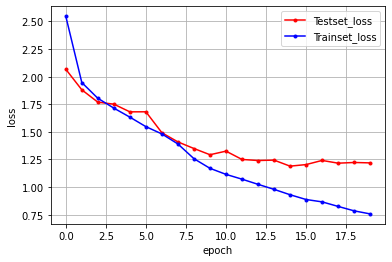

In [19]:
import numpy as np

x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 한국일보 뉴스데이터셋 분류 스터디
https://yceffort.kr/2019/01/28/pytorch-2-multi-perceptron(3)

# 네이버기사 분류 실습(LSTM)